# A first look at the scraped data from Medium. All articles tagged with `wellness` from Jan 2017 to July 2020 

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter
from itertools import combinations

In [10]:
directory = '../scraped_data/'
file = '20170101wellness20200701.json'

In [11]:
df = pd.read_json(directory+file)
df

date                                               tags  \
0     2017-01-01  [mental-health, health, wellness, emotional, s...   
1     2017-01-02  [fitness, health, wellness, weight, health-and...   
2     2017-01-03                    [soul, wellness, peace, health]   
3     2017-01-04  [self-improvement, writing, self-awareness, we...   
4     2017-01-05            [health, gluten, food, bread, wellness]   
...          ...                                                ...   
22596 2020-06-15                 [health, wellness, sleep, economy]   
22597 2020-06-15  [health, food, nutrition, sustainability, well...   
22598 2020-06-15  [mental-health, marathon, workout, wellness, r...   
22599 2020-06-15          [health, food, nutrition, wellness, diet]   
22600 2020-06-15  [fitness, mental-health, lifestyle, wellness, ...   

                                                   title               author  \
0      How well are you? 8 Ways To Measure Your Well-...     Josephine Amoako   
1                   How to Eat Healthy Foods on a Budget        Dacia Braxton   
2                                Our health and wellness  Crown of Compassion   
3          Wellness worksheets: a meditative writing aid      Laraine Domingo   
4      5 Reasons Why You’re Still Having Symptoms On ...          Mark Volmer   
...                                                  ...                  ...   
22596  Can Better Sleep Habits Help Save The World Ec...     Dave Smurthwaite   
22597        The Green Vegetable That’s Better Than Kale       Kirsten Oliver   
22598   Be Best with Unique Tips for Your First Marathon          Alex Petrov   
22599                              Sugar Is Not Your Foe   Anna Nakhiengchanh   
22600                         The Real Reason I Exercise     Chana Davis, PhD   

       claps  length                                                url  
0          1       4  https://medium.com/@joseyphina/how-well-are-yo...  
1          0       7  https://medium.com/@mensbodybuilding/how-to-ea...  
2          0       2  https://medium.com/@CrownofCompassion/our-heal...  
3          2       3  https://medium.com/@brainoflaraine/wellness-wo...  
4          0       4  https://medium.com/@Flourish_Clinic/5-reasons-...  
...      ...     ...                                                ...  
22596     87       3  https://medium.com/mindtrip/can-better-sleep-h...  
22597      0       3  https://medium.com/@kirstenoliverwriter/the-gr...  
22598      0       1  https://medium.com/@alexpetrov1970/be-best-wit...  
22599     74       6  https://medium.com/coldpressed/sugar-is-not-yo...  
22600     71       7  https://medium.com/@chanapdavis/the-real-reaso...  

[22601 rows x 7 columns]

'wellness' missing in some of these because it is misspelled. In others it is missing completely, but very few.

In [8]:
mask = ['wellness' not in tag for tag in df['tags']]
for tags in df[mask]['tags']:
    print(tags)

['corporate-culture', 'health', 'deploy', 'startup', 'entrepreneurship']
['bullying', 'fitnes', 'health', 'weight-los', 'wellnes']
['wellnes', 'immunity', 'yoga', 'short-story', 'mindfulnes']
['health', 'energy', 'wellnes', 'mindfulness', 'meditation']
['black-queer', 'blackhealingmatters', 'self-awareness', 'healing', 'yoga']
['health', 'productivity', 'mindfullness', 'wellnes', 'women']
['self-care', 'mental-health', 'health', 'wellnes', 'women']
['anxiety', 'panic-attack', 'mental-health', 'wellbeing']
['goals', 'productivity', 'snow', 'millennials', 'new-year']
['healthcare', 'digital-health', 'fda', 'wellnes', 'stephanie-bova']
['health', 'food', 'nutrition', 'gardening', 'wellnes']
['supplements', 'health', 'nutrition', 'wellnes', 'hormonal-health']
['healthcare', 'health', 'wellnes', 'politics', 'resistance']
['stretch', 'vacati', 'yoga', 'wellnes']
['mindfulnes', 'health', 'wellnes', 'meditation', 'pcos']
['self-care', 'holistic-health', 'spoonie', 'wellnes', 'chronic-illness']

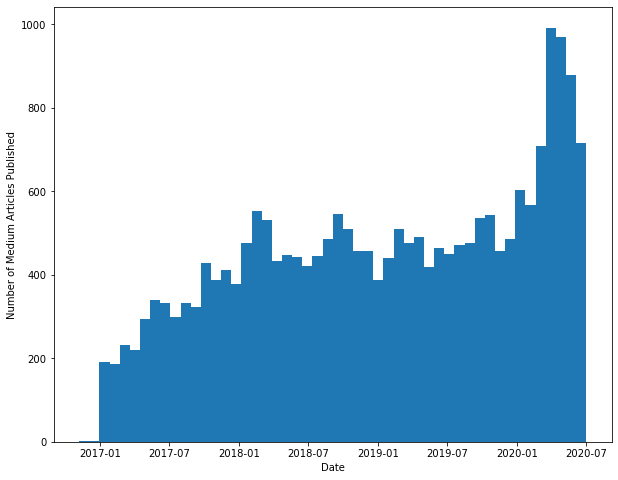

In [38]:
plt.figure(figsize=[10,8])
plt.hist(df['date'], bins=50)
plt.xlabel('Date')
plt.ylabel('Number of Medium Articles Published')
plt.show()

## Claps 

In [44]:
sorted(df['claps'],reverse=True)

[21554,
 17209,
 13874,
 12734,
 12719,
 12071,
 9894,
 8241,
 7589,
 7306,
 6227,
 6060,
 5886,
 5450,
 5382,
 5347,
 5227,
 5176,
 5104,
 5102,
 5096,
 4936,
 4904,
 4899,
 4682,
 4346,
 4313,
 4252,
 4113,
 4044,
 3977,
 3947,
 3911,
 3712,
 3635,
 3586,
 3571,
 3539,
 3534,
 3515,
 3451,
 3403,
 3357,
 3243,
 3241,
 3168,
 2877,
 2852,
 2699,
 2686,
 2656,
 2581,
 2577,
 2531,
 2510,
 2502,
 2491,
 2475,
 2474,
 2318,
 2225,
 2180,
 2088,
 2079,
 1966,
 1944,
 1942,
 1930,
 1858,
 1826,
 1824,
 1812,
 1807,
 1772,
 1753,
 1672,
 1615,
 1614,
 1580,
 1565,
 1545,
 1539,
 1535,
 1527,
 1517,
 1503,
 1490,
 1485,
 1481,
 1462,
 1454,
 1445,
 1432,
 1424,
 1404,
 1387,
 1383,
 1383,
 1363,
 1360,
 1353,
 1352,
 1350,
 1319,
 1318,
 1312,
 1311,
 1299,
 1292,
 1292,
 1287,
 1281,
 1270,
 1252,
 1248,
 1245,
 1243,
 1210,
 1196,
 1181,
 1180,
 1174,
 1172,
 1169,
 1168,
 1158,
 1153,
 1134,
 1129,
 1127,
 1124,
 1124,
 1097,
 1088,
 1087,
 1085,
 1084,
 1084,
 1074,
 1070,
 1070,
 1067,


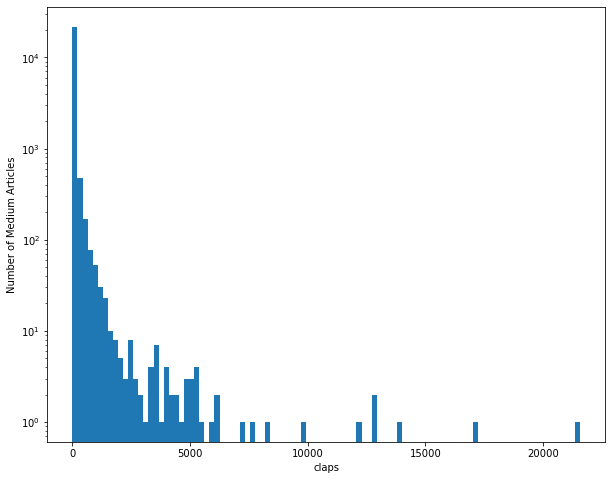

In [48]:
plt.figure(figsize=[10,8])
plt.hist(df['claps'], bins=100)
plt.semilogy()
plt.xlabel('claps')
plt.ylabel('Number of Medium Articles')
plt.show()

In [49]:
df['claps'][df['claps']>100]

24        107
217       118
275       168
331       880
488       163
         ... 
22457    1124
22531     637
22548     209
22560     198
22579     174
Name: claps, Length: 1788, dtype: int64

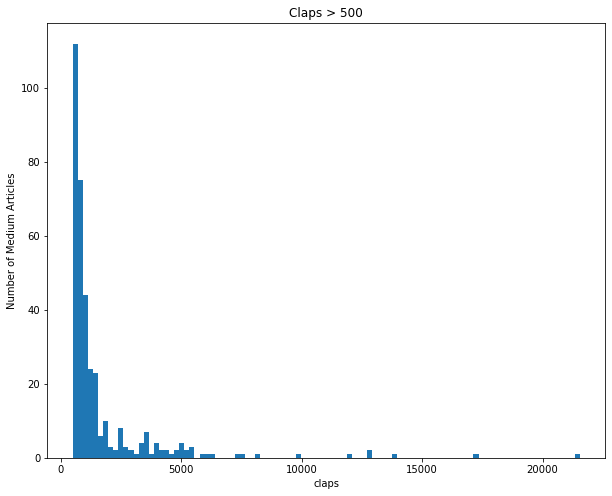

In [58]:
n = 500
plt.figure(figsize=[10,8])
plt.hist(df['claps'][df['claps']>n], bins=100)
# plt.semilogy()
plt.xlabel('claps')
plt.ylabel('Number of Medium Articles')
plt.title('Claps > {0}'.format(n))
plt.show()

## Length 

In [88]:
sorted(df['length'],reverse=True)

[51,
 48,
 37,
 35,
 35,
 34,
 31,
 31,
 30,
 30,
 29,
 29,
 29,
 28,
 28,
 27,
 27,
 27,
 27,
 27,
 26,
 25,
 25,
 24,
 24,
 24,
 24,
 24,
 24,
 23,
 23,
 23,
 23,
 23,
 23,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 21,
 21,
 21,
 21,
 21,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,


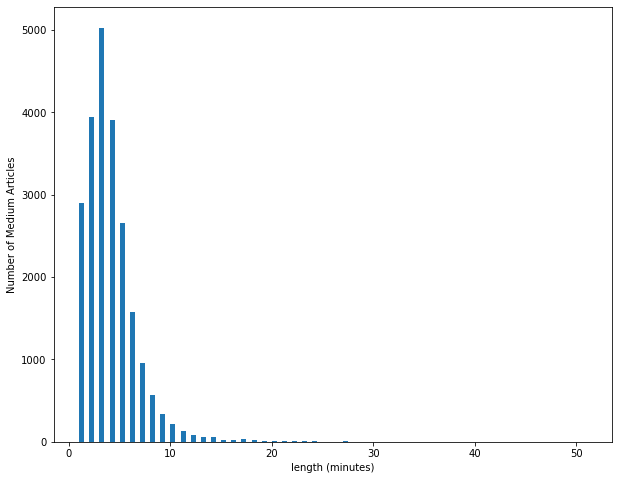

In [90]:
plt.figure(figsize=[10,8])
plt.hist(df['length'], bins=100)
# plt.semilogy()
plt.xlabel('length (minutes)')
plt.ylabel('Number of Medium Articles')
plt.show()

## Missing dates 

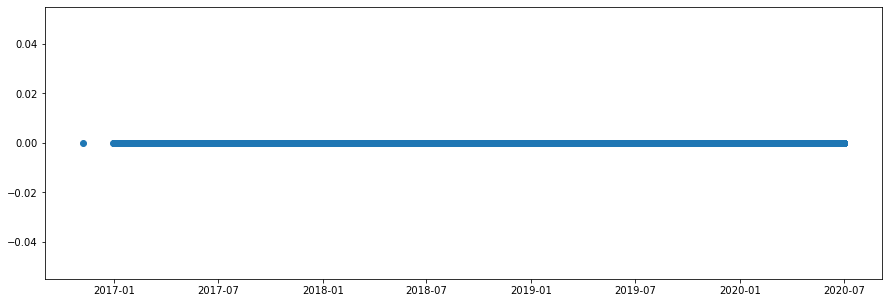

In [6]:
plt.figure(figsize=[15,5])
plt.scatter(df['date'], np.zeros(len(df)))
plt.show()

In [6]:
set(df['date'])

{20150122,
 20150127,
 20150202,
 20150205,
 20150209,
 20150212,
 20150214,
 20150216,
 20150224,
 20150225,
 20150226,
 20150304,
 20150310,
 20150311,
 20150312,
 20150318,
 20150319,
 20150321,
 20150324,
 20150326,
 20150329,
 20150331,
 20150403,
 20150410,
 20150414,
 20150415,
 20150416,
 20150420,
 20150424,
 20150429,
 20150501,
 20150502,
 20150505,
 20150507,
 20150510,
 20150511,
 20150512,
 20150513,
 20150514,
 20150515,
 20150516,
 20150520,
 20150524,
 20150527,
 20150529,
 20150614,
 20150619,
 20150622,
 20150710,
 20150717,
 20150826,
 20150907,
 20151007,
 20151013,
 20151015,
 20151030,
 20151111,
 20151116,
 20151128,
 20151209,
 20170717,
 20170727,
 20170814,
 20170816,
 20170902,
 20170903,
 20170909,
 20170912,
 20170914,
 20200420,
 20200428,
 20200429,
 20200430,
 20200501}

# Tag Frequency

In [14]:
list_of_tags_per_article = df['tags'].to_list()

In [15]:
all_tags = [tag for tags_in_article in list_of_tags_per_article for tag in tags_in_article ]

In [16]:
print('{0} total tags'.format(len(all_tags)))
print('{0} unique tags'.format(len(set(all_tags))))

106453 total tags
7230 unique tags


In [17]:
tags_count_list = Counter(all_tags).most_common()
# top_tags_counts = [tag for tag in tags_count_list if tag[1]>=500 ]
top_tags_counts = tags_count_list[:50]
top_tags = [pair[0] for pair in top_tags_counts]
top_counts = [pair[1] for pair in top_tags_counts]

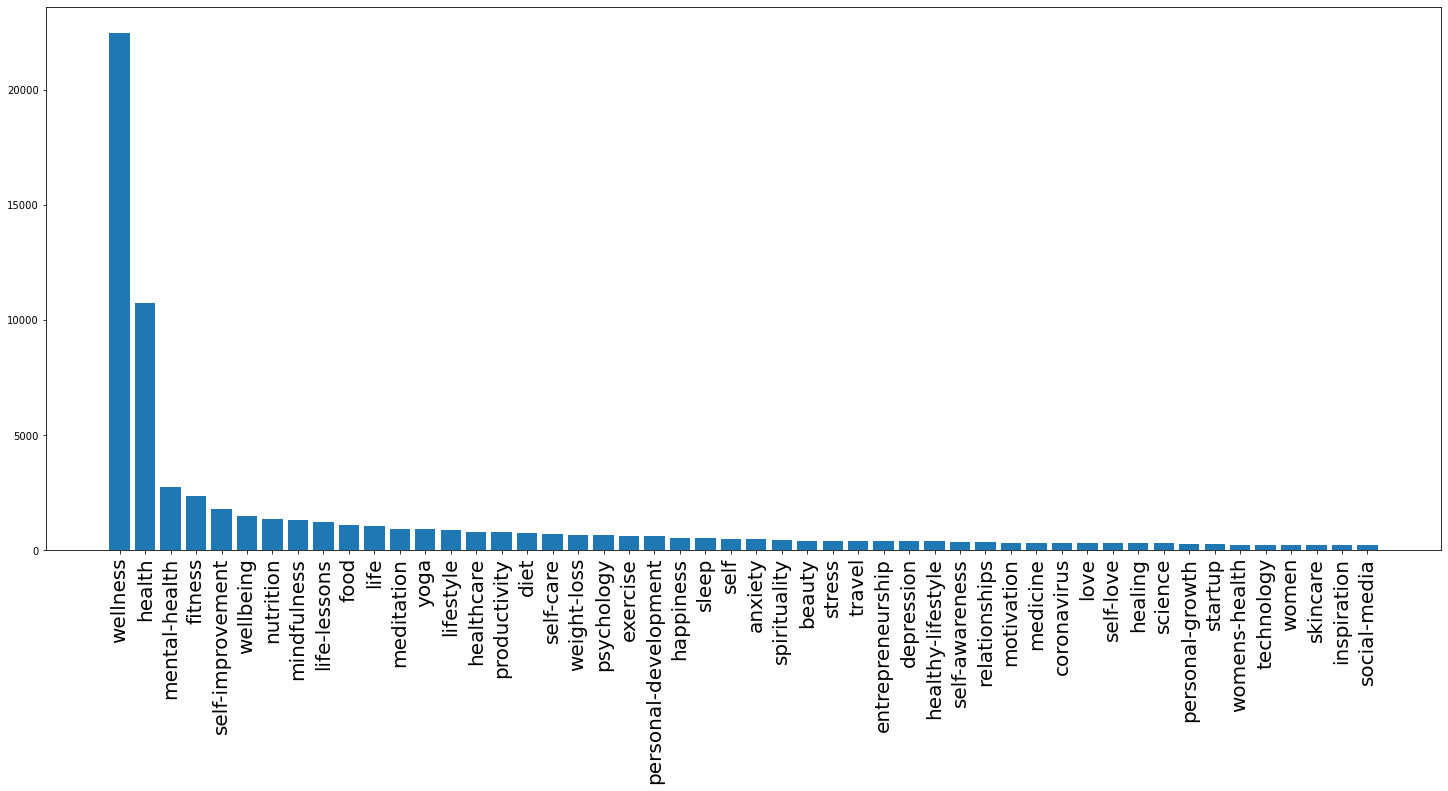

In [61]:
plt.figure(figsize=[25,10])
plt.bar(range(len(top_tags_counts)), top_counts)

plt.xticks(range(len(top_tags_counts)),top_tags, rotation='vertical', fontsize=20)
plt.show()

## WORDCLOUD 

In [13]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

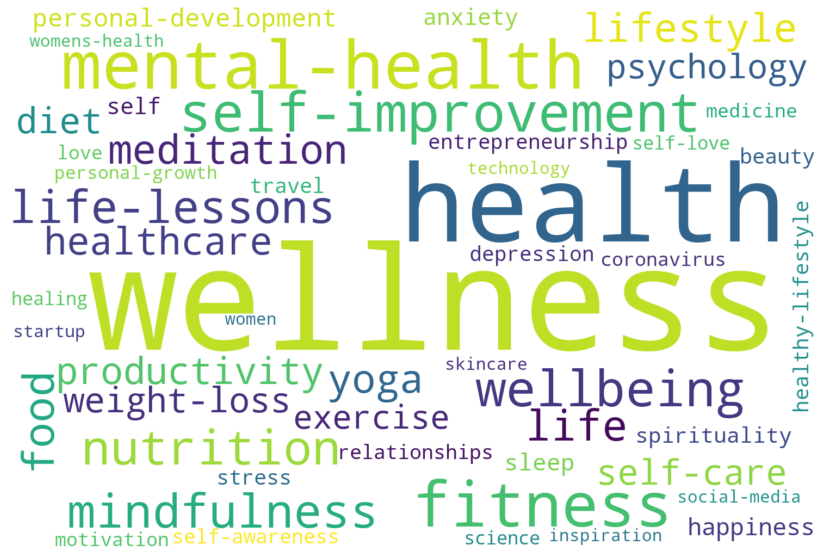

In [9]:
wordcloud = WordCloud(width=1500, height=1000, background_color='white')
wordcloud.fit_words(dict(top_tags_counts))
plt.figure(figsize=[15,10])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [20]:
from PIL import Image

(-0.5, 499.5, 499.5, -0.5)

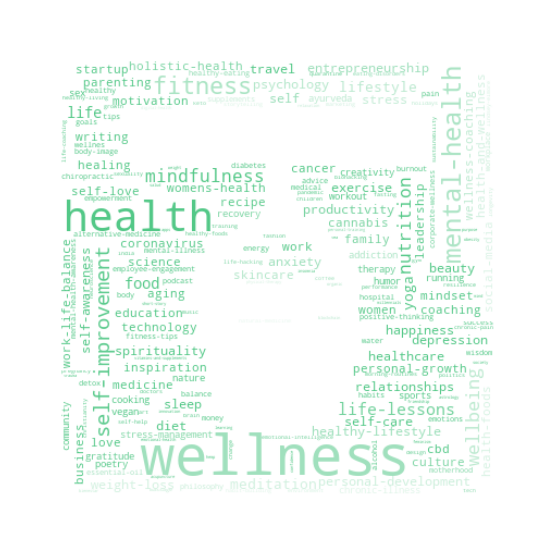

In [18]:
mask = np.array(Image.open("../../logos/w3ll.png"))
wordcloud_w3ll = WordCloud(background_color="white", mode="RGBA", mask=mask).fit_words(dict(tags_count_list))
image_colors = ImageColorGenerator(mask)

plt.figure(figsize=[15,10])
plt.imshow(wordcloud_w3ll.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

(-0.5, 499.5, 499.5, -0.5)

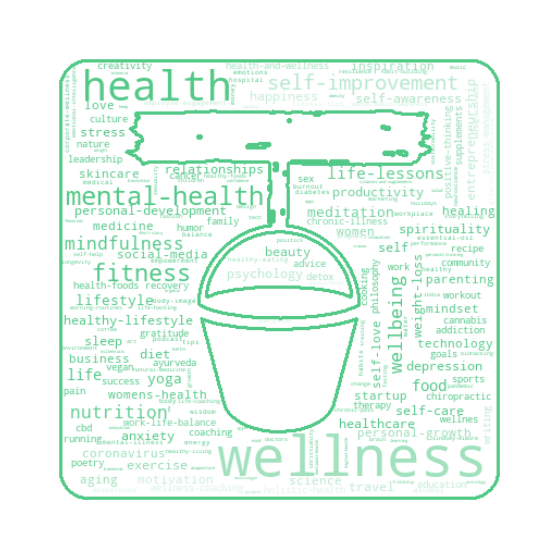

In [62]:
mask = np.array(Image.open("../../logos/w3ll.png"))
wordcloud_w3ll = WordCloud(contour_width=2, contour_color=(82,201,135), background_color="white", mode="RGB", mask=mask).fit_words(dict(tags_count_list))
image_colors = ImageColorGenerator(mask)

plt.figure(figsize=[15,10])
plt.imshow(wordcloud_w3ll.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

(-0.5, 499.5, 499.5, -0.5)

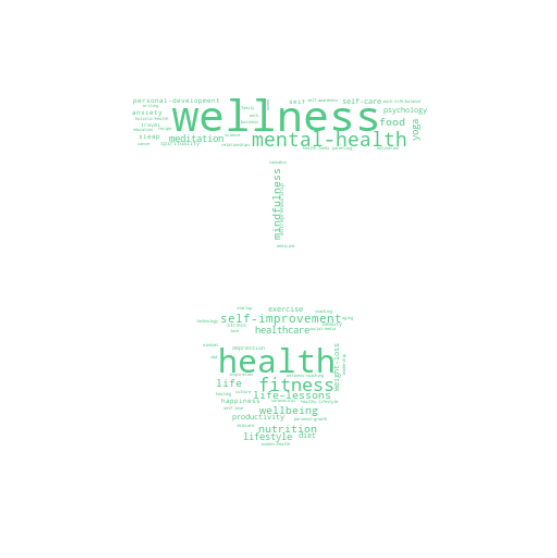

In [54]:
mask = np.array(Image.open("../../logos/w3ll_2.png"))
wordcloud_w3ll = WordCloud(color_func=lambda *args, **kwargs: (82,201,135), background_color='white', mode="RGB", mask=mask).fit_words(dict(tags_count_list))

plt.figure(figsize=[15,10])
# plt.imshow(wordcloud_w3ll.recolor(color_func=image_colors), interpolation="bilinear")
plt.imshow(wordcloud_w3ll, interpolation="bilinear")
plt.axis("off")

(-0.5, 499.5, 499.5, -0.5)

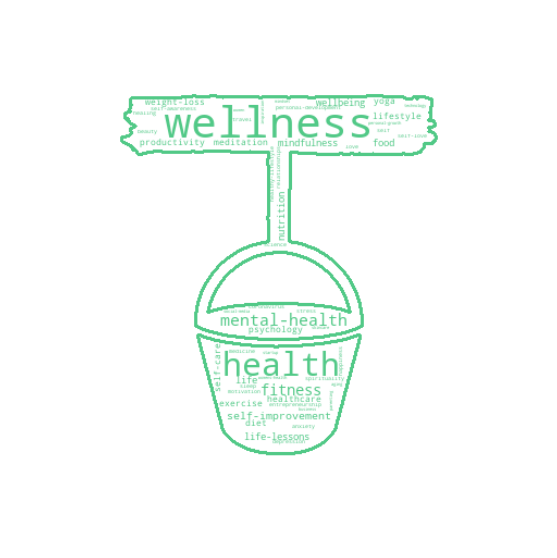

In [58]:
mask = np.array(Image.open("../../logos/w3ll_2.png"))
wordcloud_w3ll = WordCloud(color_func=lambda *args, **kwargs: (82,201,135), contour_color=(82,201,135), contour_width=2, background_color='white', mode="RGB", mask=mask).fit_words(dict(tags_count_list))

plt.figure(figsize=[15,10])
# plt.imshow(wordcloud_w3ll.recolor(color_func=image_colors), interpolation="bilinear")
plt.imshow(wordcloud_w3ll, interpolation="bilinear")
plt.axis("off")

(-0.5, 499.5, 499.5, -0.5)

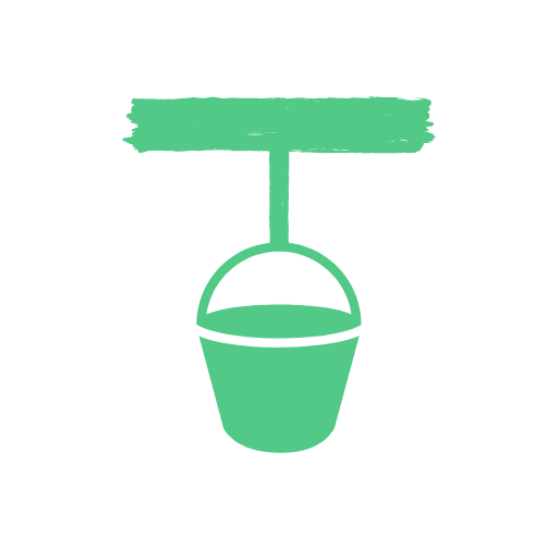

In [50]:
plt.figure(figsize=[15,10])
plt.imshow(mask, interpolation="bilinear")
plt.axis("off")

## network viz 

In [63]:
import networkx as nx
G = nx.Graph()

In [64]:
# G.add_nodes_from(['wellness','healthcare','lifestyle','yoga'])
# G.add_nodes_from(top_tags)
for tag_count in top_tags_counts:
    G.add_node(tag_count[0], size=tag_count[1]/10)

In [65]:
G.nodes.data()

NodeDataView({'wellness': {'size': 2247.6}, 'health': {'size': 1073.6}, 'mental-health': {'size': 276.0}, 'fitness': {'size': 236.3}, 'self-improvement': {'size': 178.7}, 'wellbeing': {'size': 149.3}, 'nutrition': {'size': 136.6}, 'mindfulness': {'size': 131.9}, 'life-lessons': {'size': 122.0}, 'food': {'size': 110.0}, 'life': {'size': 106.0}, 'meditation': {'size': 94.2}, 'yoga': {'size': 90.8}, 'lifestyle': {'size': 89.6}, 'healthcare': {'size': 81.6}, 'productivity': {'size': 80.3}, 'diet': {'size': 73.7}, 'self-care': {'size': 70.4}, 'weight-loss': {'size': 67.7}, 'psychology': {'size': 64.3}, 'exercise': {'size': 61.0}, 'personal-development': {'size': 60.1}, 'happiness': {'size': 55.1}, 'sleep': {'size': 51.4}, 'self': {'size': 49.1}, 'anxiety': {'size': 48.0}, 'spirituality': {'size': 44.3}, 'beauty': {'size': 41.5}, 'stress': {'size': 41.3}, 'travel': {'size': 40.7}, 'entrepreneurship': {'size': 39.4}, 'depression': {'size': 38.9}, 'healthy-lifestyle': {'size': 38.3}, 'self-awa

In [66]:
for tag_list in list_of_tags_per_article:
    
    #keep only tags in top_tags
    tag_list = [tag for tag in tag_list if tag in top_tags]
#     print(tag_list)
    if len(tag_list)<2:
        continue
    else:
        combination_of_nodes = list(combinations(tag_list, 2))
        for edge in combination_of_nodes:
            if edge in G.edges:
                G.edges[edge]['frequency']+=1
                G.edges[edge]['inverse']=1/G.edges[edge]['frequency']
            else:
                G.add_edge(*edge, frequency=1, inverse=1)

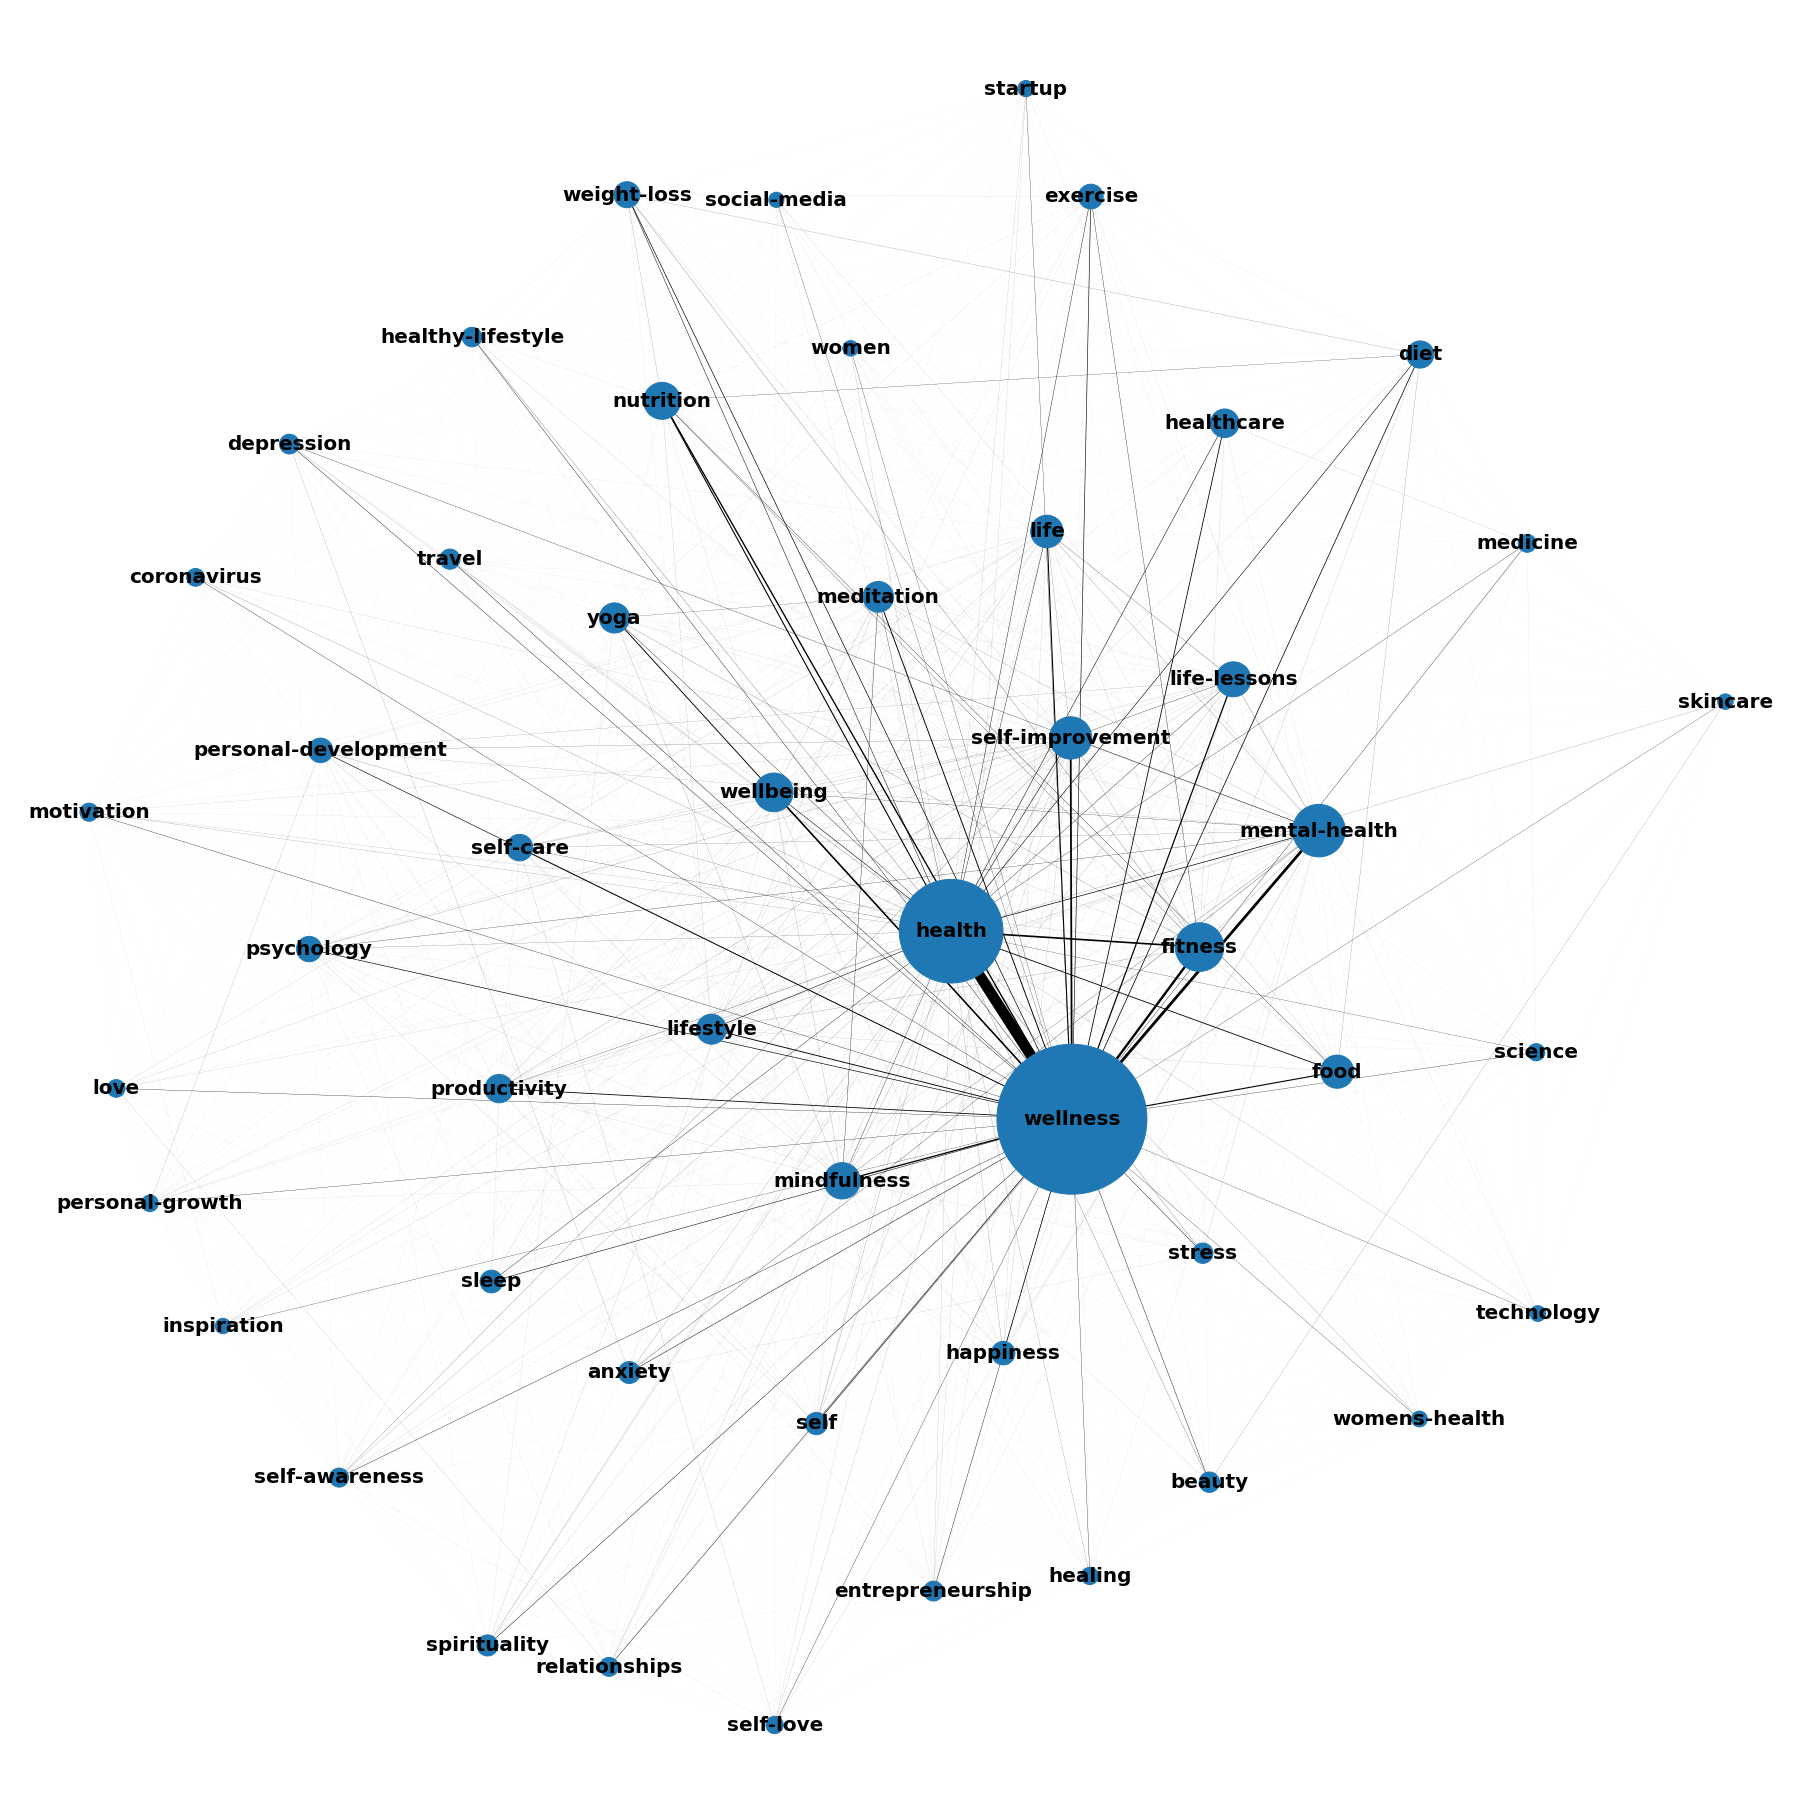

In [68]:

plt.figure(figsize=[25,25])
nx.draw_kamada_kawai(G,
        with_labels=True,
        font_weight='bold',
        font_size=20,
       width=[G.edges[edge]['frequency']/1000 for edge in G.edges],
        node_size=[count for count in top_counts],
        weight='frequency')



### exclude 'wellness' and 'health'

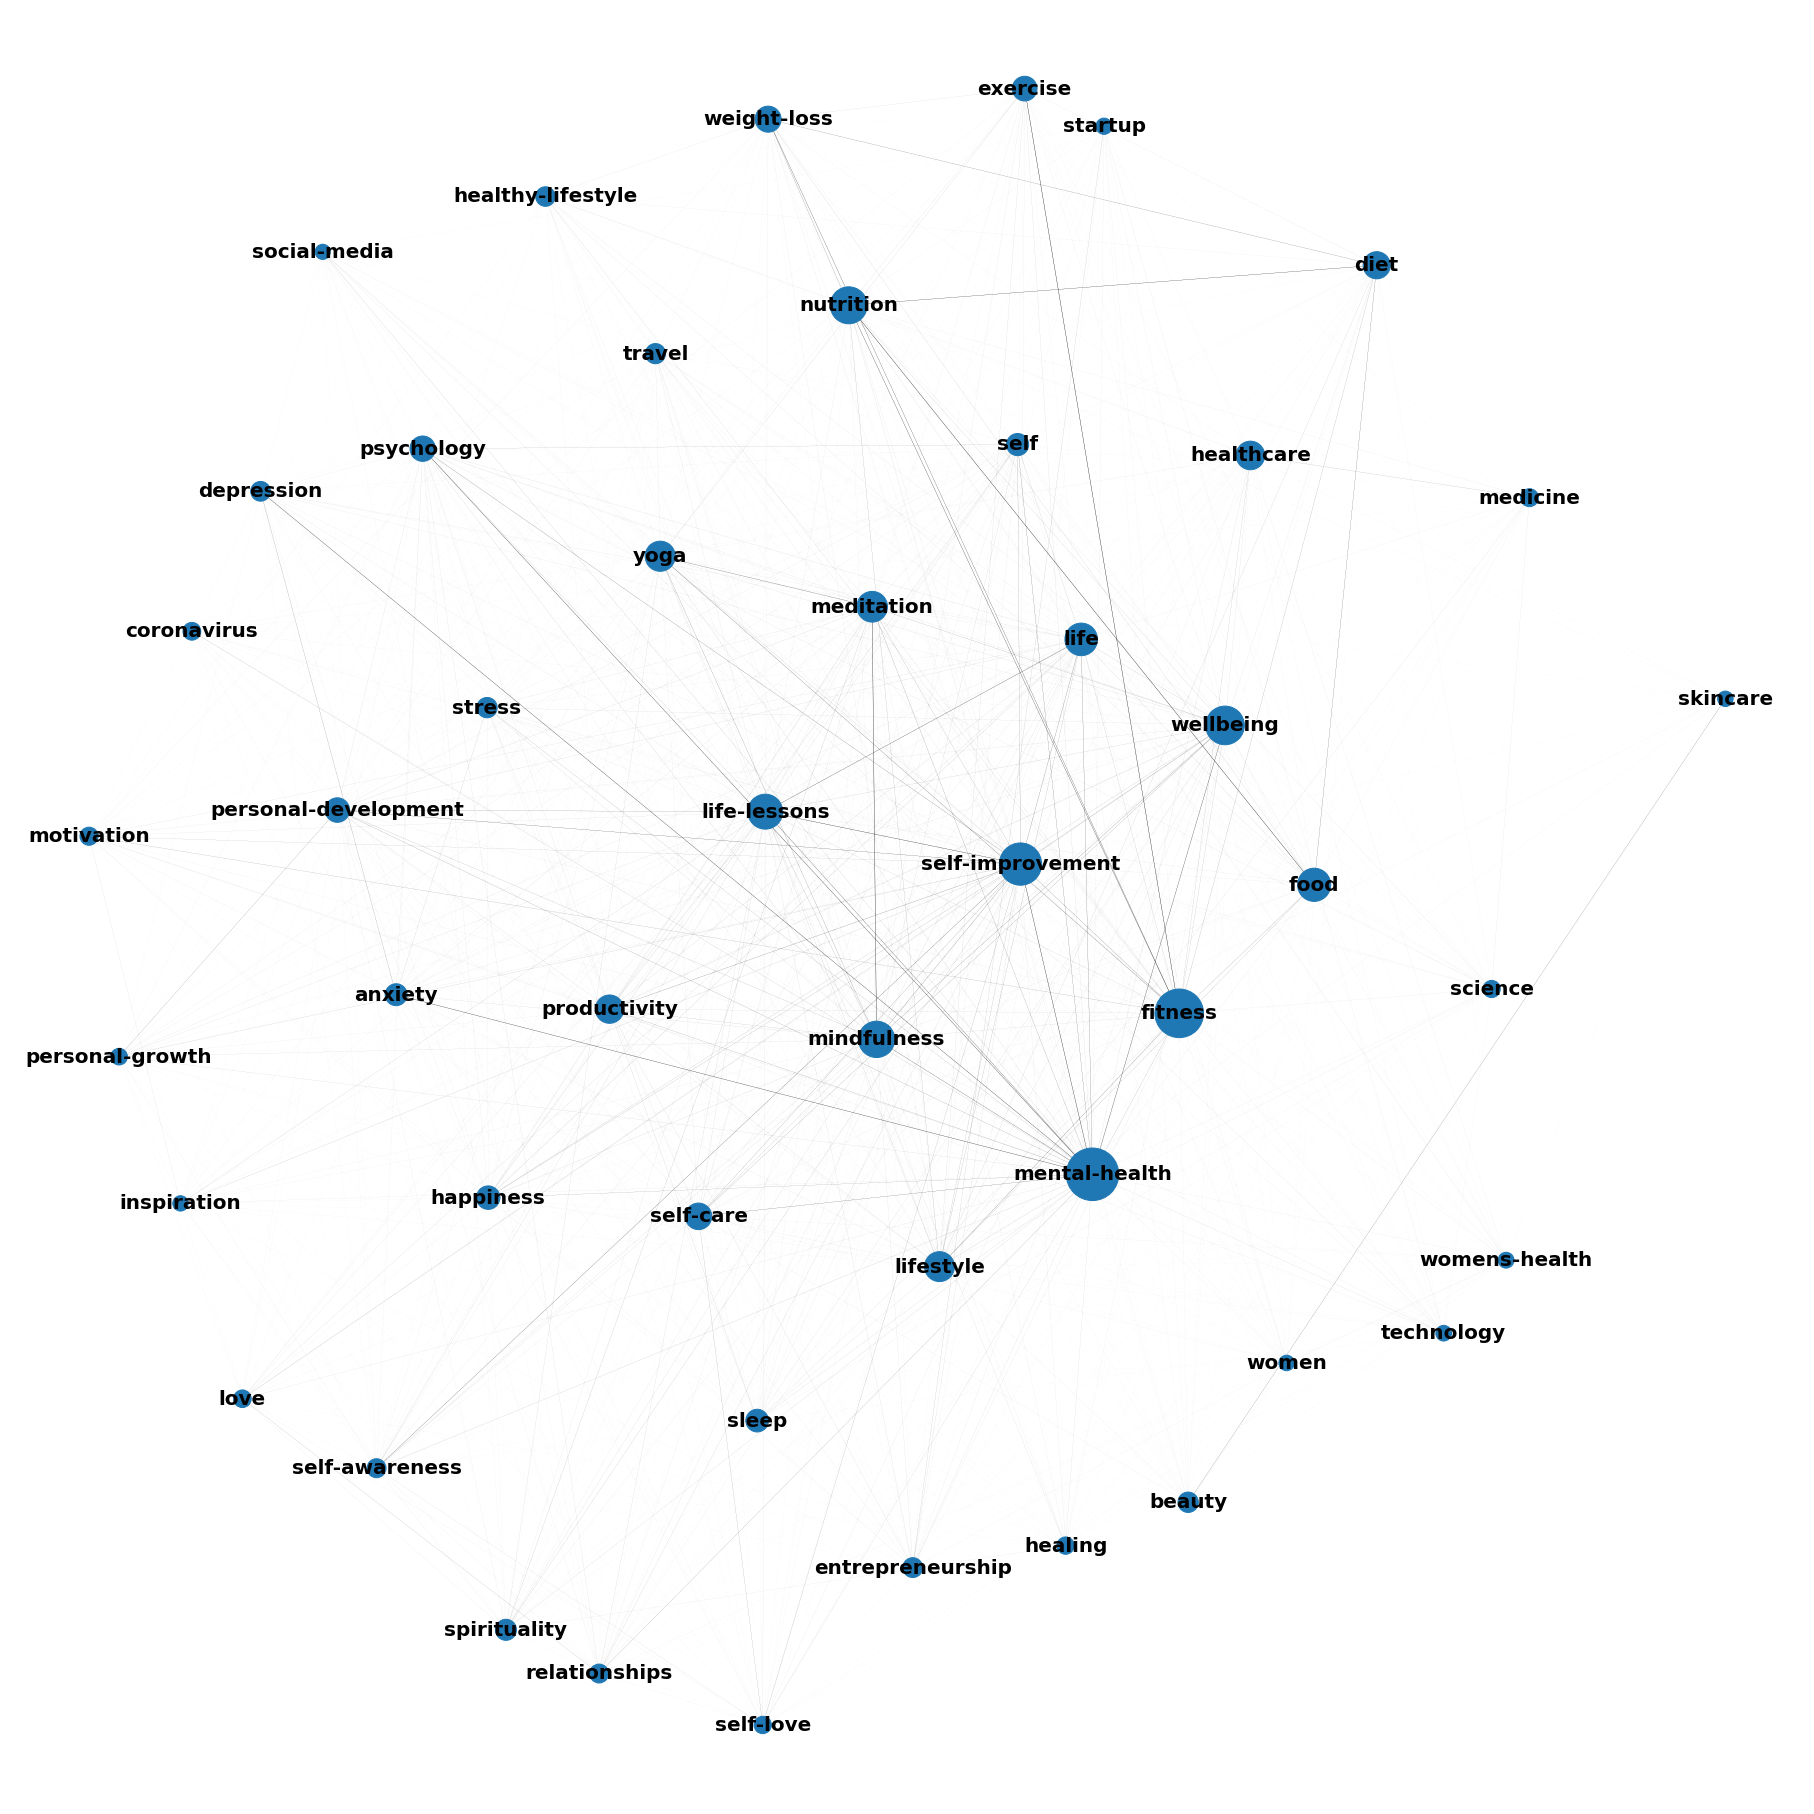

In [87]:
G = nx.Graph()
top_tags_counts_here = top_tags_counts[2:]
top_tags_here = top_tags[2:]
top_counts_here = top_counts[2:]

for tag_count in top_tags_counts_here:
    G.add_node(tag_count[0], size=tag_count[1]/10)

for tag_list in list_of_tags_per_article:
    #keep only tags in top_tags
    tag_list = [tag for tag in tag_list if tag in top_tags_here]
#     print(tag_list)
    if len(tag_list)<2:
        continue
    else:
        combination_of_nodes = list(combinations(tag_list, 2))
        for edge in combination_of_nodes:
            if edge in G.edges:
                G.edges[edge]['frequency']+=1
                G.edges[edge]['inverse']=1/G.edges[edge]['frequency']
            else:
                G.add_edge(*edge, frequency=1, inverse=1)
                
plt.figure(figsize=[25,25])
nx.draw_kamada_kawai(G,
        with_labels=True,
        font_weight='bold',
        font_size=20,
       width=[G.edges[edge]['frequency']/1000 for edge in G.edges],
        node_size=[count for count in top_counts_here],
        weight='frequency')


## claps per post for each tag 

In [19]:
unique_tags = set(all_tags)

In [23]:
number_of_articles = dict(Counter(all_tags).most_common())
number_of_claps = { x:0 for x in unique_tags}

In [50]:
for article in df.iterrows():
    for tag in article[1]['tags']:
        number_of_claps[tag]+=article[1]['claps']
number_of_claps = {k: v for k, v in sorted(number_of_claps.items(), key=lambda item: item[1], reverse=True)}

In [54]:
claps_per_post = {key: number_of_claps[key]/number_of_articles[key] for key in unique_tags}
claps_per_post = {k: v for k, v in sorted(claps_per_post.items(), key=lambda item: item[1], reverse=True)}

In [75]:
tags_df = pd.DataFrame(pd.Series(number_of_articles),
                       columns=['number of articles'])
tags_df['number of claps'] = pd.Series(number_of_claps)
tags_df['claps per post'] = tags_df['number of claps'] / tags_df['number of articles']

In [117]:
tags_df = tags_df[tags_df['number of articles'] > 100]
top_tags_df = tags_df.sort_values('claps per post', ascending=False).head(20)
top_tags_df

number of articles  number of claps  claps per post
science                          296            60515      204.442568
self                             491            94884      193.246436
weight-loss                      677           126361      186.648449
humor                            137            22977      167.715328
culture                          180            24922      138.455556
leadership                       176            22587      128.335227
diet                             737            86074      116.789688
medicine                         323            36407      112.715170
poetry                           138            15292      110.811594
psychology                       643            66905      104.051322
technology                       246            25521      103.743902
startup                          263            26511      100.802281
cancer                           203            19921       98.133005
aging                            227            22260       98.061674
life                            1060           100183       94.512264
relationships                    358            33304       93.027933
depression                       389            34589       88.917738
philosophy                       129            11399       88.364341
entrepreneurship                 394            34804       88.335025
lifestyle                        896            78838       87.988839

In [106]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

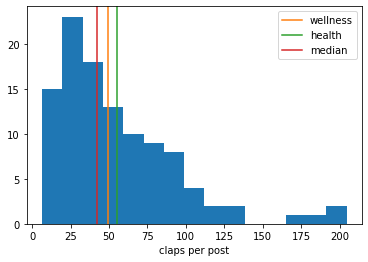

In [109]:
plt.hist(tags_df['claps per post'], bins = 15)
plt.axvline(tags_df['claps per post']['wellness'], label='wellness', c=colors[1])
plt.axvline(tags_df['claps per post']['health'], label='health', c=colors[2])
plt.axvline(np.median(tags_df['claps per post']), label='median', c=colors[3])
plt.xlabel('claps per post')
plt.legend()
plt.show()

## if we only include posts with 100+ claps are the results similar?

In [129]:
df_1_claps = df[df['claps']>1]
df_10_claps = df[df['claps']>10]
df_50_claps = df[df['claps']>50]
df_100_claps = df[df['claps']>100]
df_1000_claps = df[df['claps']>1000]
dfs = [df, df_1_claps, df_10_claps, df_50_claps, df_100_claps, df_1000_claps]
df_labels = ['all', '>1 clap', '>10 claps', '>50 claps', '>100 claps', '>1000 claps']

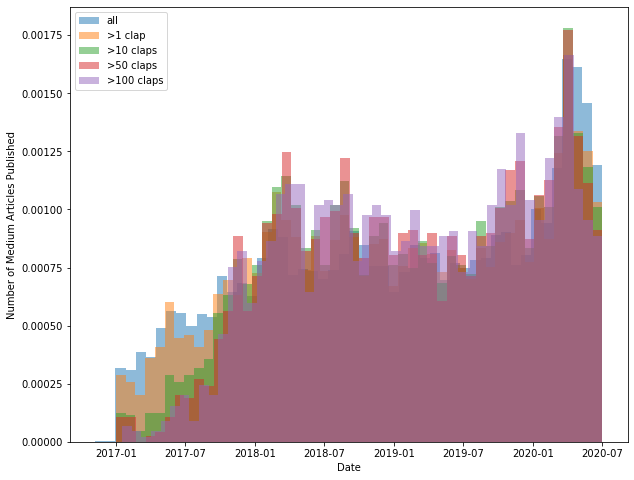

In [133]:
plt.figure(figsize=[10,8])
for df_i, label in zip(dfs[:-1],df_labels[:-1]):
    plt.hist(df_i['date'], bins=50, density=True, alpha=0.5, label=label)
plt.xlabel('Date')
plt.ylabel('Number of Medium Articles Published')
plt.legend()
plt.show()

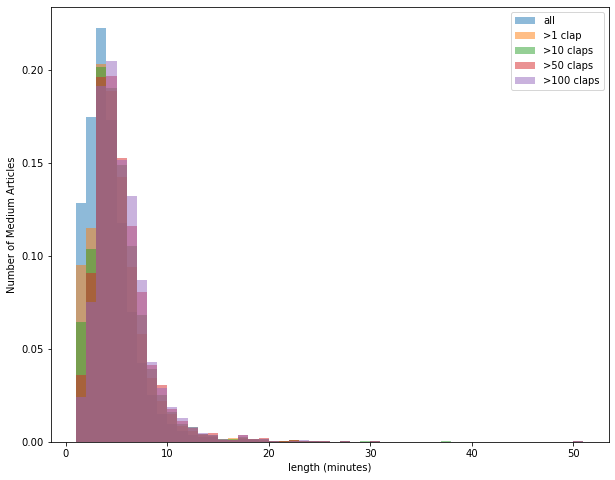

In [140]:
plt.figure(figsize=[10,8])
for df_i, label in zip(dfs[:-1],df_labels[:-1]):
    plt.hist(df_i['length'], bins=50, density=True, alpha=0.5, label=label)
# plt.hist(df_100_claps['length'], bins=100, density=True, alpha=0.5)
plt.xlabel('length (minutes)')
plt.ylabel('Number of Medium Articles')
plt.legend()
plt.show()

make function that determines the top tags given a df

In [144]:
def top_tags_in_df(df_i):
    list_of_tags_per_article = df_i['tags'].to_list()
    all_tags = [tag for tags_in_article in list_of_tags_per_article for tag in tags_in_article ]
    
    number_of_articles = dict(Counter(all_tags).most_common())
    
    number_of_claps = { x:0 for x in unique_tags}
    for article in df_i.iterrows():
        for tag in article[1]['tags']:
            number_of_claps[tag]+=article[1]['claps']
    number_of_claps = {k: v for k, v in sorted(number_of_claps.items(), key=lambda item: item[1], reverse=True)}
    
    tags_df = pd.DataFrame(pd.Series(number_of_articles), columns=['number of articles'])
    tags_df['number of claps'] = pd.Series(number_of_claps)
    tags_df['claps per post'] = tags_df['number of claps'] / tags_df['number of articles']
    
    tags_df = tags_df[tags_df['number of articles'] > 100]
    top_tags_df = tags_df.sort_values('claps per post', ascending=False)
    return top_tags_df

In [145]:
top_tags_in_df(df)

number of articles  number of claps  claps per post
science                           296            59627      201.442568
self                              491            93411      190.246436
weight-loss                       677           124330      183.648449
humor                             137            22566      164.715328
culture                           180            24382      135.455556
...                               ...              ...             ...
cooking                           148             1453        9.817568
holistic-health                   210             1556        7.409524
wellnes                           115              551        4.791304
wellness-coaching                 223             1027        4.605381
chiropractic                      125              446        3.568000

[108 rows x 3 columns]

In [146]:
top_tags_in_df(df_1_claps)

number of articles  number of claps  claps per post
weight-loss                          216           124277      575.356481
science                              170            59602      350.600000
diet                                 265            83802      316.233962
self                                 328            93370      284.664634
medicine                             144            35419      245.965278
culture                              110            24368      221.527273
sleep                                165            35177      213.193939
aging                                109            21559      197.788991
nutrition                            482            94858      196.800830
depression                           170            33377      196.335294
lifestyle                            398            76072      191.135678
relationships                        172            32192      187.162791
psychology                           354            64909      183.358757
entrepreneurship                     188            33574      178.585106
startup                              144            25694      178.430556
technology                           139            24759      178.122302
life                                 549            96887      176.479053
cancer                               111            19297      173.846847
food                                 427            70714      165.606557
love                                 142            22768      160.338028
stress                               137            21303      155.496350
health                              3628           560823      154.581863
travel                               148            22454      151.716216
mental-health                       1251           182536      145.912070
personal-growth                      148            21376      144.432432
healthcare                           211            29479      139.710900
self-improvement                     883           118802      134.543601
life-lessons                         649            86859      133.835131
writing                              105            13908      132.457143
wellness                            7899          1044226      132.197240
meditation                           329            42529      129.267477
happiness                            225            28519      126.751111
productivity                         403            50891      126.280397
personal-development                 314            37480      119.363057
spirituality                         183            19426      106.153005
fitness                              739            76885      104.039242
mindfulness                          514            52090      101.342412
exercise                             220            21330       96.954545
self-awareness                       185            17934       96.940541
anxiety                              200            19084       95.420000
inspiration                          115            10918       94.939130
wellbeing                            430            40436       94.037209
coronavirus                          123            10405       84.593496
self-care                            221            18570       84.027149
yoga                                 262            22013       84.019084
social-media                         108             7736       71.629630
self-love                            119             8284       69.613445
healing                              121             8357       69.066116
motivation                           119             6306       52.991597

In [147]:
top_tags_in_df(df_10_claps)

number of articles  number of claps  claps per post
weight-loss                          142           123937      872.795775
science                              125            59415      475.320000
diet                                 185            83462      451.145946
self                                 259            92997      359.061776
medicine                             101            35242      348.930693
entrepreneurship                     104            33215      319.375000
sleep                                110            34945      317.681818
nutrition                            307            94048      306.345277
depression                           110            33108      300.981818
lifestyle                            286            75546      264.146853
psychology                           255            64458      252.776471
food                                 282            70045      248.386525
life                                 393            96155      244.669211
relationships                        131            31984      244.152672
technology                           102            24556      240.745098
health                              2322           554845      238.951335
startup                              107            25538      238.672897
mental-health                        832           180425      216.856971
wellness                            5015          1030773      205.537986
meditation                           205            41960      204.682927
self-improvement                     583           117363      201.308748
healthcare                           147            29200      198.639456
personal-growth                      108            21182      196.129630
happiness                            145            28151      194.144828
life-lessons                         457            86010      188.205689
personal-development                 203            36974      182.137931
productivity                         281            50320      179.074733
spirituality                         108            19089      176.750000
fitness                              467            75664      162.021413
wellbeing                            253            39578      156.434783
mindfulness                          329            51218      155.677812
anxiety                              126            18748      148.793651
self-awareness                       123            17665      143.617886
exercise                             148            21003      141.912162
yoga                                 154            21480      139.480519
self-care                            134            18164      135.552239

In [148]:
top_tags_in_df(df_50_claps)

number of articles  number of claps  claps per post
diet                                 125            81613      652.904000
nutrition                            190            90773      477.752632
self                                 203            91411      450.300493
food                                 173            67018      387.387283
health                              1366           528346      386.783309
lifestyle                            194            73009      376.335052
life                                 247            91895      372.044534
psychology                           183            62326      340.579235
wellness                            2912           971851      333.740041
meditation                           119            39435      331.386555
mental-health                        534           172048      322.187266
self-improvement                     346           111130      321.184971
productivity                         159            46550      292.767296
fitness                              237            69134      291.704641
wellbeing                            128            35925      280.664062
life-lessons                         291            81444      279.876289
personal-development                 129            34870      270.310078
mindfulness                          188            46969      249.835106

In [149]:
top_tags_in_df(df_100_claps)

number of articles  number of claps  claps per post
nutrition                        114            85310      748.333333
health                           857           493241      575.543757
self                             156            88442      566.935897
food                             117            63234      540.461538
lifestyle                        133            68828      517.503759
life                             169            86811      513.674556
wellness                        1787           895674      501.216564
psychology                       119            58005      487.436975
fitness                          128            61778      482.640625
self-improvement                 213           102299      480.276995
mental-health                    341           159102      466.574780
life-lessons                     188            74974      398.797872
mindfulness                      117            41917      358.264957

In [150]:
top_tags_in_df(df_1000_claps)

number of articles  number of claps  claps per post
wellness                 154           445587     2893.422078

## better way of showing? make cut on 100+articles optional